<a href="https://colab.research.google.com/github/MatheusBraga1106/Entregas-Matheus/blob/main/Entregas-Matheus/css/Aula_10_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [31]:
# Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/MatheusBraga1106/Arquivos_uteis_e_aulas/main/anuario-2021-dados_abertos-tabela1-1.csv', delimiter=';')

In [32]:
#Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()

# Substituir vírgulas por pontos nos valores numéricos e converter para float
numeric_columns = ['VALOR DA RESERVA']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Preencher valores ausentes, se houver
df.fillna(0, inplace=True)

# Visualizar as primeiras linhas do DataFrame
print(df.head())

      BLOCO            REGIÃO    PAÍS  VALOR DA RESERVA   ANO
0  Não OPEP  América do Norte  Canadá        174.200000  2011
1  Não OPEP  América do Norte  Canadá        173.716100  2012
2  Não OPEP  América do Norte  Canadá        173.037537  2013
3  Não OPEP  América do Norte  Canadá        172.155995  2014
4  Não OPEP  América do Norte  Canadá        171.512308  2015


In [33]:
# Shape
df.shape  #mostra a quantidade de linhas/colunas do seu arquivo csv

(550, 5)

In [34]:
# Amostra dos 5 primeiros dados
df.head()

,BLOCO,REGIÃO,PAÍS,VALOR DA RESERVA,ANO
0,Não OPEP,América do Norte,Canadá,174.200000,2011
1,Não OPEP,América do Norte,Canadá,173.716100,2012
2,Não OPEP,América do Norte,Canadá,173.037537,2013
3,Não OPEP,América do Norte,Canadá,172.155995,2014
4,Não OPEP,América do Norte,Canadá,171.512308,2015


In [35]:
# Amostra dos 5 ultimos dados
df.tail()

,BLOCO,REGIÃO,PAÍS,VALOR DA RESERVA,ANO
545,Não OPEP,Ásia-Pacífico,Outros,1.185389,2016
546,Não OPEP,Ásia-Pacífico,Outros,1.173657,2017
547,Não OPEP,Ásia-Pacífico,Outros,1.170493,2018
548,Não OPEP,Ásia-Pacífico,Outros,1.366695,2019
549,Não OPEP,Ásia-Pacífico,Outros,1.000000,2020


In [36]:
# Colunas do conjunto de dados
df.columns

Index(['BLOCO', 'REGIÃO', 'PAÍS', 'VALOR DA RESERVA', 'ANO'], dtype='object')

In [37]:
# Verificando o tipo de dado de cada coluna
df.dtypes

BLOCO                object
REGIÃO               object
PAÍS                 object
VALOR DA RESERVA    float64
ANO                   int64
dtype: object

In [38]:
# Resumo estatístico da coluna com o Valor de RESERVA
df['VALOR DA RESERVA'].describe()

count    550.000000
mean      31.000926
std       64.934605
min        0.000000
25%        1.176590
50%        3.033750
75%       24.295877
max      304.000000
Name: VALOR DA RESERVA, dtype: float64

Tratamento de Dados

In [39]:
# Verificando se há registros duplicados
df[df.duplicated()]

,BLOCO,REGIÃO,PAÍS,VALOR DA RESERVA,ANO


In [40]:
# Verificando de há valores ausentes
df.isnull().sum()

BLOCO               0
REGIÃO              0
PAÍS                0
VALOR DA RESERVA    0
ANO                 0
dtype: int64

**1 - Qual a região com maior valor de reserva de petroleo?**

In [41]:
# Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_p1_total = df.groupby('REGIÃO')['VALOR DA RESERVA'].sum()

# .groupby agrupa os valores de acordo com a coluna especificada.
# No exemplo acima, agrupamos os valores da coluna "Cidade" e calculamos a soma da coluna "Valor_Venda" para cada cidade.
# O resultado é um objeto do tipo DataFrameGroupBy, que pode ser usado para realizar outras operações de agregação, como média, mediana, desvio padrão, etc.

In [42]:
# Então encontramos a cidade com maior valor de venda
regiao_maior_reserva = df_p1_total.idxmax()
maior_reserva = df_p1_total.max()
print(f"Regiao com maior reserva: {regiao_maior_reserva} e maior reserva: {maior_reserva}")

Regiao com maior reserva: Oriente Médio e maior reserva: 8154.09689105


In [43]:
# Para conferir o resultado
df_p1_total.sort_values(ascending = False)

REGIÃO
Oriente Médio                           8154.096891
Américas Central e do Sul               3232.772863
América do Norte                        2351.070064
Comunidade dos Estados Independentes    1442.698537
África                                  1265.108945
Ásia-Pacífico                            466.613358
Europa                                   138.148682
Name: VALOR DA RESERVA, dtype: float64

## **2. Qual ano teve a maior exploração de petroleo**


Apresente em forma de grafico


In [44]:
# Calculamos o total de reservas por ano
df_p2 = df.groupby('ANO')['VALOR DA RESERVA'].sum()

In [45]:
df_p2.head()

ANO
2011    1674.300000
2012    1683.566726
2013    1691.894855
2014    1694.437496
2015    1683.903018
Name: VALOR DA RESERVA, dtype: float64

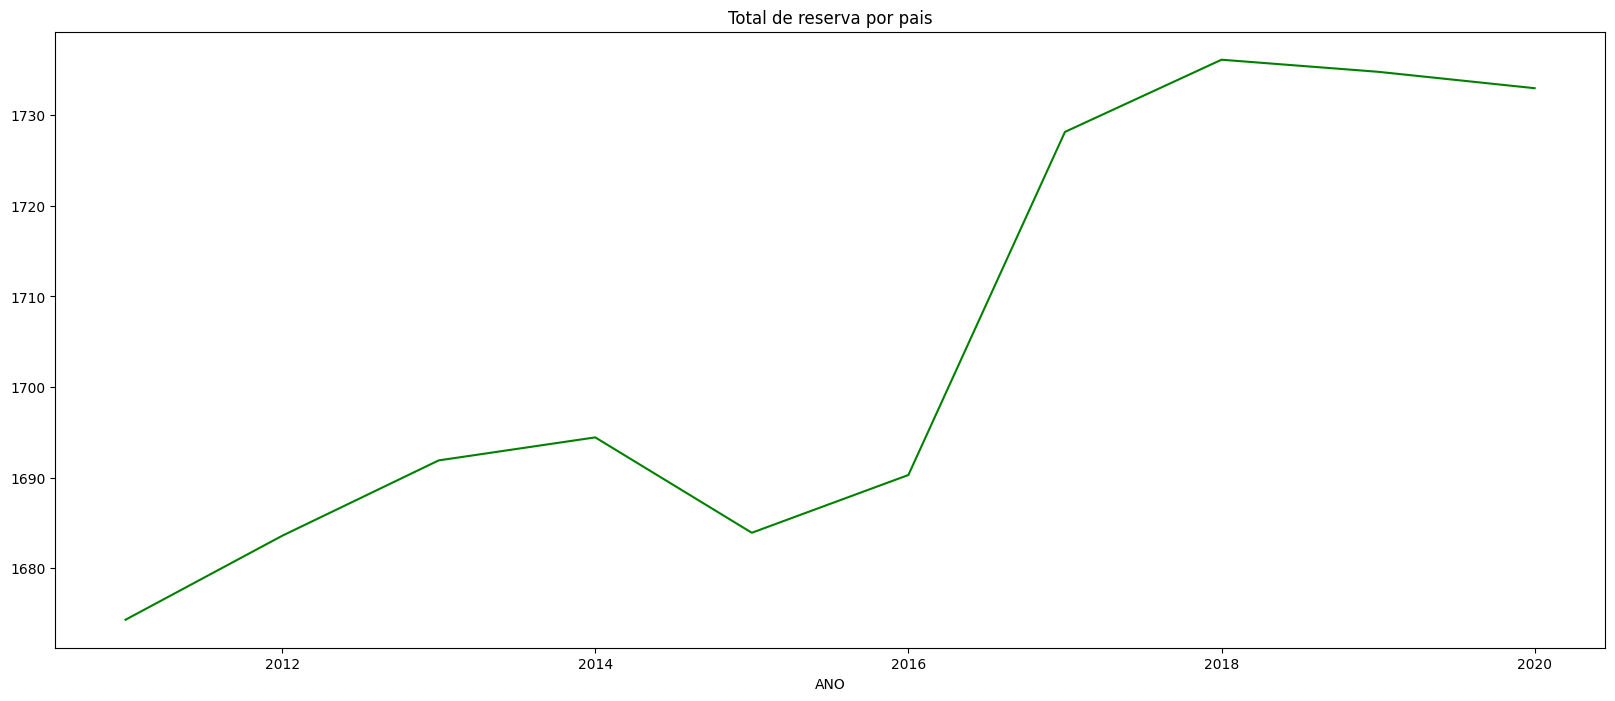

In [46]:
# Plot
plt.figure(figsize = (20, 8))
df_p2.plot(x = 'ANO', y = 'Valor_reserva', color = 'green')
plt.title('Total de reserva por pais')
plt.show()

# O método plot() do objeto DataFrame é usado para criar visualizações de dados.
# Ele pode ser usado para plotar vários tipos de gráficos, incluindo gráficos de linhas, gráficos de barras, gráficos de dispersão e histogramas.
# No exemplo acima, usamos o método plot() para criar um gráfico de barras que mostra o total de vendas por data do pedido.
# O argumento x especifica a coluna que será usada para o eixo x do gráfico, e o argumento y especifica a coluna que será usada para o eixo y do gráfico.
# O argumento color especifica a cor das barras do gráfico.
# O argumento figsize especifica o tamanho da figura do gráfico.
# O método title() é usado para definir o título do gráfico.
# O método show() é usado para exibir o gráfico.


## **3. Qual o total de reservas por pais**

Apresente o resultado em um gráfico de barras.

In [47]:
# Agrupamos por estado e calculamos o total de vendas
df_p3 = df.groupby('PAÍS')['VALOR DA RESERVA'].sum().reset_index()

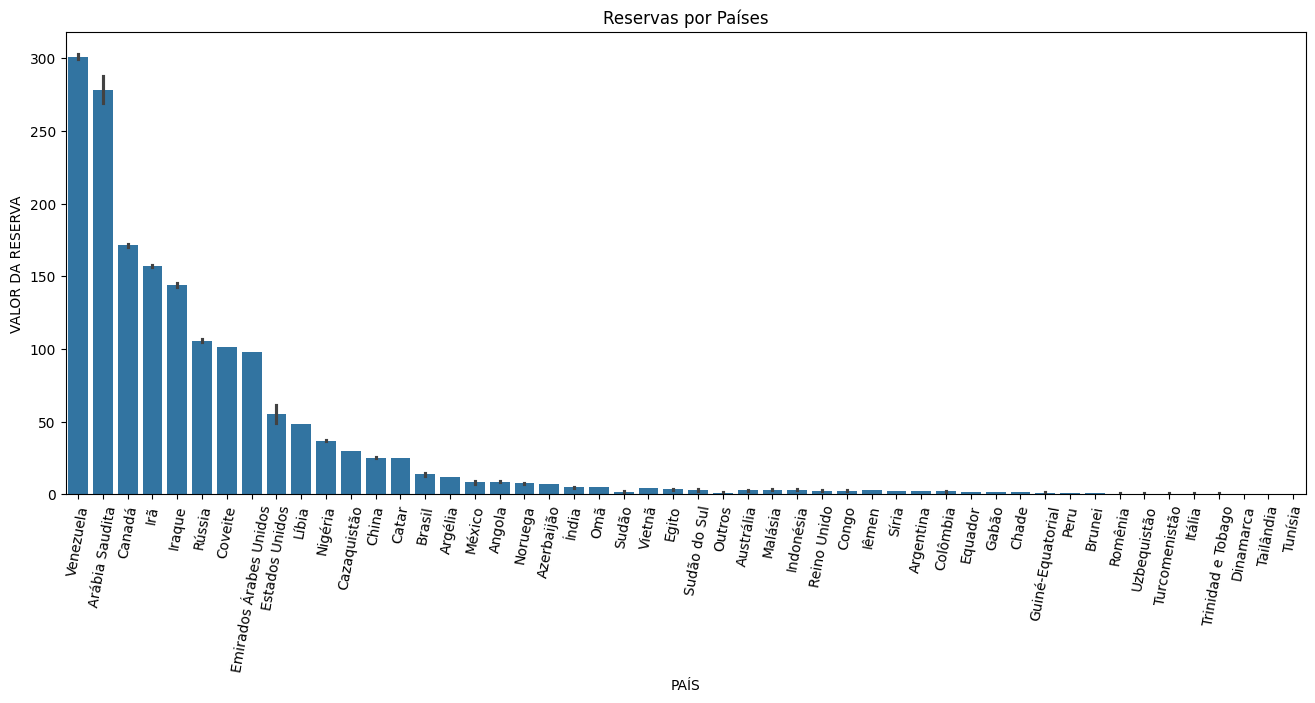

In [48]:
# Plot
df_sorted = df.sort_values(by='VALOR DA RESERVA', ascending=False)

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=df_sorted, y='VALOR DA RESERVA', x='PAÍS').set(title='Reservas por Países')
plt.xticks(rotation=80)
plt.show()

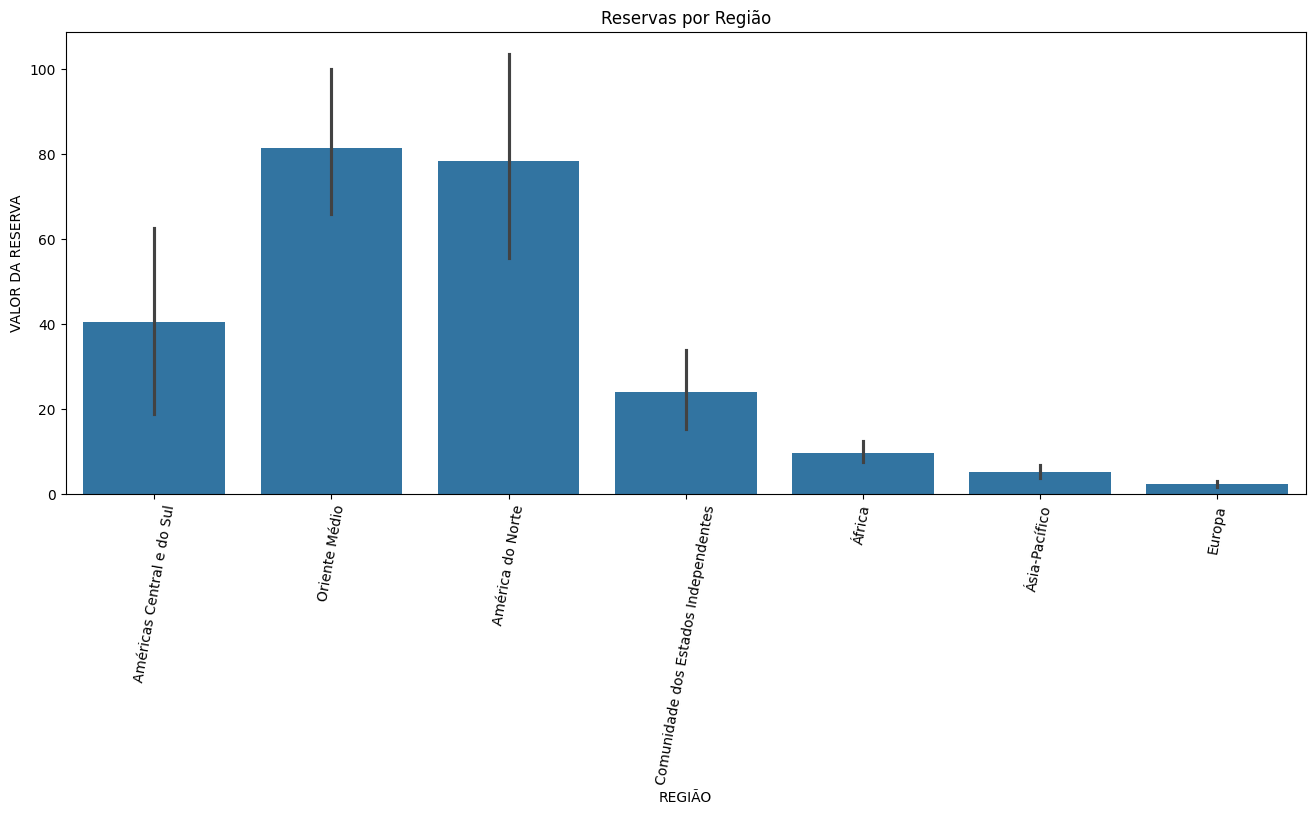

In [49]:
# Plot
df_sorted_1 = df.sort_values(by='VALOR DA RESERVA', ascending=False)

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=df_sorted_1, y='VALOR DA RESERVA', x='REGIÃO').set(title='Reservas por Região')
plt.xticks(rotation=80)
plt.show()

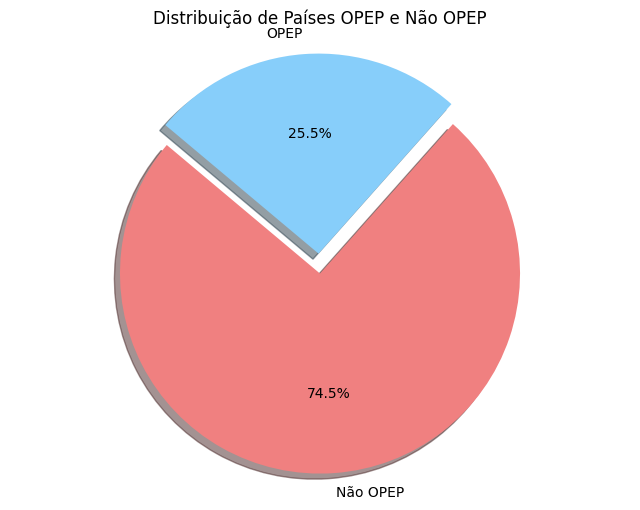

In [50]:
# Contar a quantidade de países OPEP e não OPEP
count_by_opep = df['BLOCO'].value_counts()

# Criar o gráfico de pizza
labels = ['Não OPEP', 'OPEP']
sizes = count_by_opep.values
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  # explode 1st slice (OPEP)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribuição de Países OPEP e Não OPEP')
plt.show()

<ipython-input-51-60954aa06ff4>:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


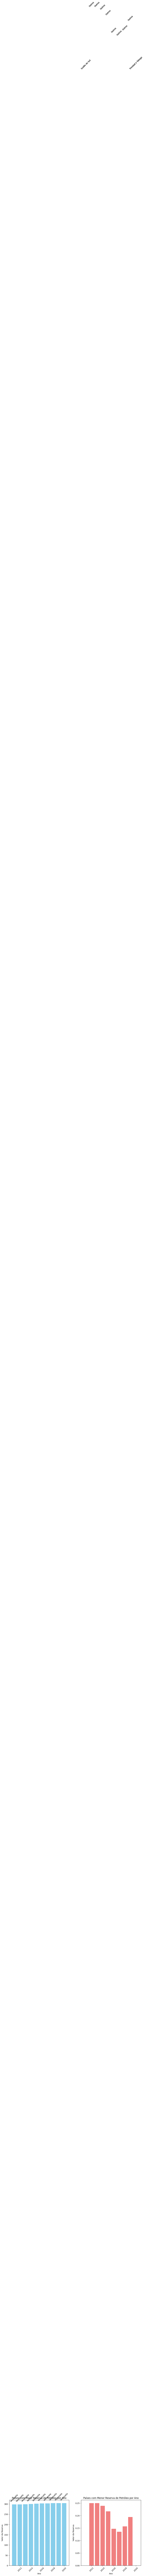

In [51]:
import matplotlib.pyplot as plt

# Agrupar por ano e país e encontrar o país com maior e menor reserva em cada ano
max_reserves_by_year = df.groupby('ANO').apply(lambda x: x.loc[x['VALOR DA RESERVA'].idxmax()])[['ANO', 'PAÍS', 'VALOR DA RESERVA']]
min_reserves_by_year = df.groupby('ANO').apply(lambda x: x.loc[x['VALOR DA RESERVA'].idxmin()])[['ANO', 'PAÍS', 'VALOR DA RESERVA']]

# Encontrar o país com menor reserva de petróleo do mundo em cada ano
idx_global_min = df.groupby('ANO')['VALOR DA RESERVA'].idxmin()
global_min_reserves_by_year = df.loc[idx_global_min][['ANO', 'PAÍS', 'VALOR DA RESERVA']]

# Criar figura e subplots com tamanho fixo
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar os países com a maior reserva
bars_max = axes[0].bar(max_reserves_by_year['ANO'], max_reserves_by_year['VALOR DA RESERVA'], color='skyblue', label='Maior Reserva')

# Plotar os países com a menor reserva
bars_min = axes[1].bar(min_reserves_by_year['ANO'], min_reserves_by_year['VALOR DA RESERVA'], color='lightcoral', label='Menor Reserva')

# Plotar o país com a menor reserva do mundo
for i, bar in enumerate(bars_min):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, global_min_reserves_by_year.iloc[i]['PAÍS'], ha='center', va='bottom', rotation=45)

# Configurações para o primeiro subplot
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor da Reserva')
axes[0].set_title('Países com Maior Reserva de Petróleo por Ano')
axes[0].tick_params(axis='x', rotation=45)

# Adicionar rótulos aos barras do primeiro subplot
for bar, country in zip(bars_max, max_reserves_by_year['PAÍS']):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, country, ha='center', va='bottom', rotation=45)

# Configurações para o segundo subplot
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Valor da Reserva')
axes[1].set_title('Países com Menor Reserva de Petróleo por Ano')
axes[1].tick_params(axis='x', rotation=45)

# Adicionar rótulos aos barras do segundo subplot
for bar, country in zip(bars_min, min_reserves_by_year['PAÍS']):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, country, ha='center', va='bottom', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()





